# AIPI 590 - XAI | Assignment #04
### Explainable Techniques 2
### Diya Mirji

#### Include the button below. Change the link to the location in your github repository:
#### https://colab.research.google.com/github/dvm14/Duke-XAI/blob/main/diya_explainable_2.ipynb


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dvm14/Duke-XAI/blob/main/diya_explainable_2.ipynb)

In [1]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "Duke-XAI" # Change to your repo name
git_path = 'https://github.com/dvm14/Duke-XAI.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt


rm: cannot remove './sample_data': No such file or directory
fatal: destination path 'Duke-XAI' already exists and is not an empty directory.


In [2]:
# Change working directory to location of notebook
path_to_notebook = os.path.join(repo_name)
%cd "{path_to_notebook}"
%ls

/content/Duke-XAI
diya_assignment2.ipynb    machine_learning_court.ipynb  wine_quality_merged.csv
diya_explainable_2.ipynb  README.md
lime_exp2.png             Telco-Customer-Churn.csv


In [6]:
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install pygam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 3.0 MB/s eta 0:00:00


In [7]:
!pip install shap

In [8]:
!pip install xgboost

In [18]:
!python -m pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [26]:
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-x410jsbj/alepython_6b7f59c9c0ca434caf250e692ebf949b
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-x410jsbj/alepython_6b7f59c9c0ca434caf250e692ebf949b
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'alepython' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'alepython'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for alepython: filename=alepython-0.1.dev17+g286350ab6

In [57]:
!pip install seaborn

In [5]:
# Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Models
import xgboost
from sklearn.model_selection import train_test_split

# XAI
import shap
import seaborn as sns
from alepython import ale_plot
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

In [6]:
df = pd.read_csv("wine_quality_merged.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
X = df.drop("type", axis=1)
y = df["type"]
y = y.map({'red': 0, 'white': 1})

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify = y)
model = xgboost.XGBClassifier().fit(X_train, y_train)

Correlation Matrix:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual sugar  chlorides  free sulfur dioxide 

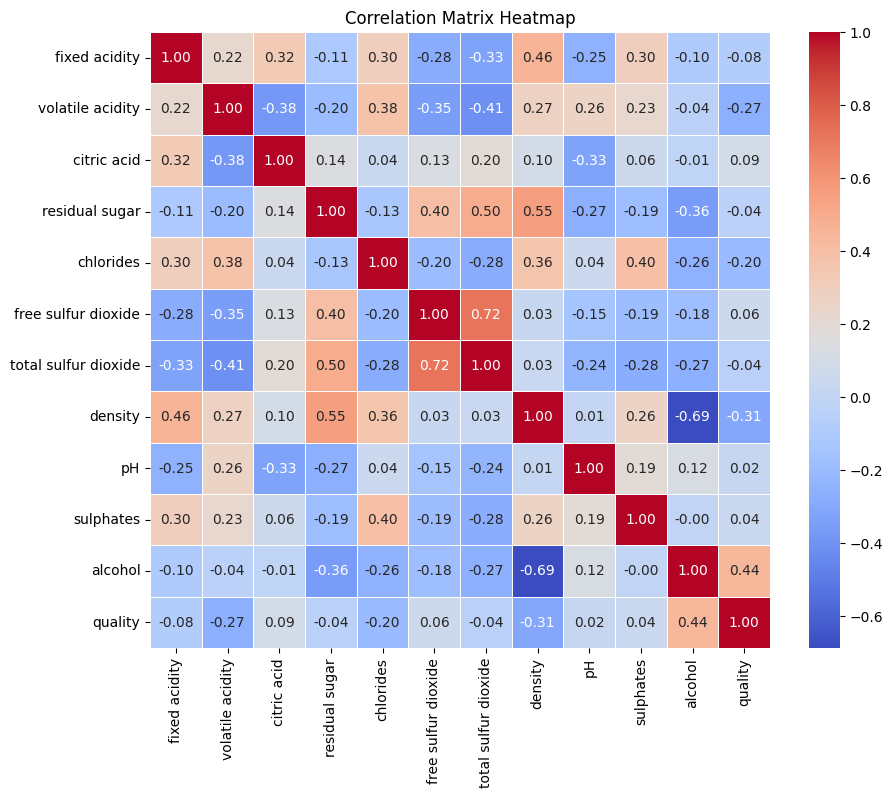

In [9]:
print("Correlation Matrix:")
correlation_matrix = X.corr()
print(correlation_matrix)

# Visualize the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

As shown from the Correlation matrix above, there are no highly correlated features. The highest correlation value is 0.72 between "free sulfur dioxide" and "total sulfure dioxide", which is not too high of a correlation value.

## Ice Plots

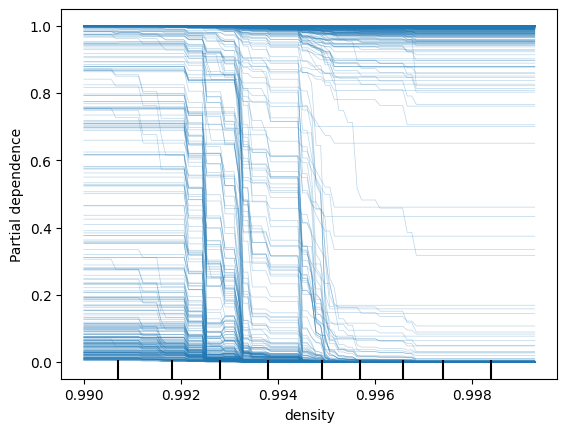

In [10]:
# Choose the feature of interest
features = ["density"]

# Use PartialDependenceDisplay to display the ICE plot
PartialDependenceDisplay.from_estimator(model, X_test, features, kind='individual') #kind='individual'

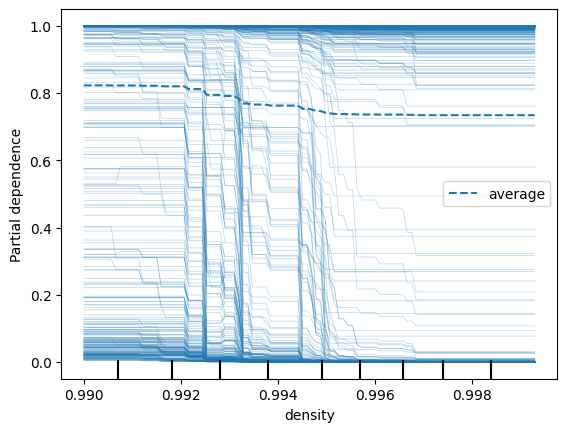

In [11]:
# Use PartialDependenceDisplay to display the ICE plot and the PDP overlayed on top
PartialDependenceDisplay.from_estimator(model, X_test, features, kind='both') #kind='both'

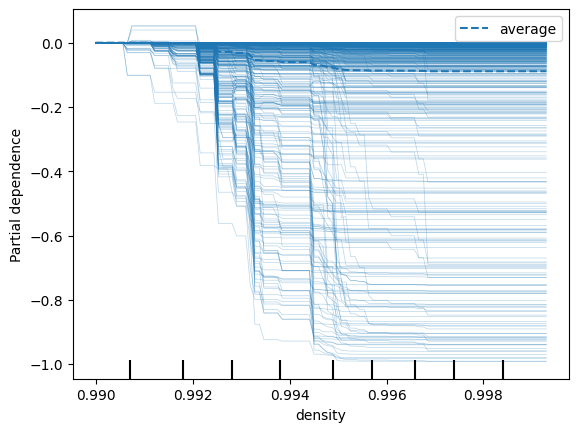

In [12]:
PartialDependenceDisplay.from_estimator(model, X_test, features, kind='both', centered=True)

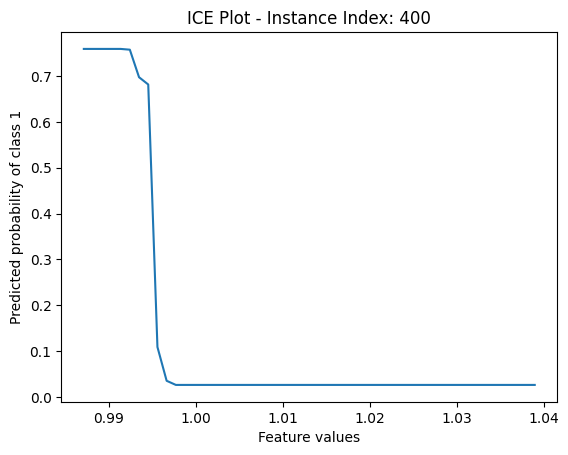

In [13]:
# Choose the instance and feature for which you want to plot the ICE plot
instance_index = 400  # Choose the index of the instance you want to visualize
feature_index = 7  # Let's look at "density"

# Create feature grid
feature_values = np.linspace(np.min(X.iloc[:, feature_index]), np.max(X.iloc[:, feature_index]), num=50)

# Initialize array to store average predictions
average_predictions = np.zeros_like(feature_values)

# Extract the instance of interest
instance = X.iloc[[instance_index]]

# Duplicate the instance to modify feature values
instance_modified = instance.copy()

# Loop over feature values
for i, value in enumerate(feature_values):
    # Set the chosen feature to the current value for the instance:
    instance_modified.iloc[:, feature_index] = value

    # Predict using the modified instance:
    prediction = model.predict_proba(instance_modified)[:, 1]

    # Store the prediction for the current feature value:
    average_predictions[i] = prediction.item()

# Plot the ICE plot
plt.plot(feature_values, average_predictions)
plt.xlabel(f'Feature values')
plt.ylabel('Predicted probability of class 1')
plt.title(f'ICE Plot - Instance Index: {instance_index}')
plt.show()

### Interpretation
From these ICE plots and the instance above, it is shown that as the "density" feature value increases, it is less likely to predict that the wine is a white wine. At a density of 0.990, there is the highest chance that the wine is a white wine at a probability of around 0.8. And at a density of 0.996 to 1.04, there is almost no chance that the wine is a white wine at a probability of around 0.

## Partial Dependence Plots (PDP)

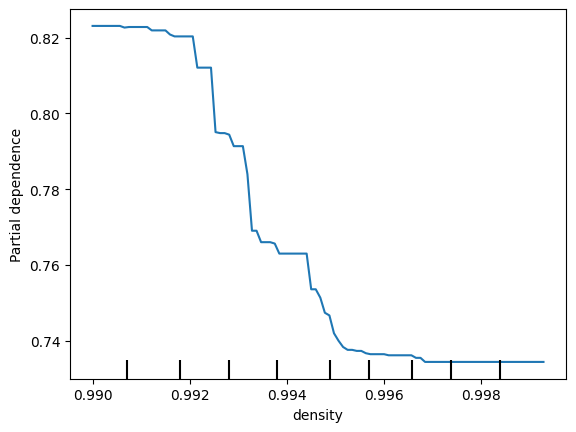

In [14]:
# Use PartialDependenceDisplay to plot PDP
PartialDependenceDisplay.from_estimator(model, X_test, features, kind='average') #kind='average'

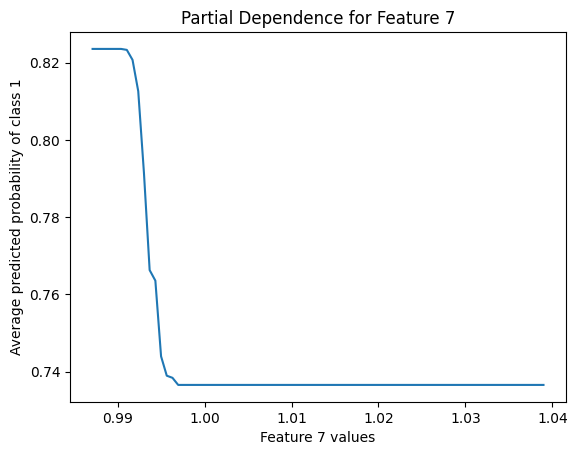

In [15]:
# Choose the feature for which you want to plot partial dependence
feature_index = 7  # For example, 7th feature density

# Create feature grid - here is where you can update the size of the grid by updating num
feature_values = np.linspace(np.min(X.iloc[:, feature_index]), np.max(X.iloc[:, feature_index]), num=80)

# Initialize array to store average predictions
average_predictions = np.zeros_like(feature_values)

# Duplicate the dataset to modify feature values
X_modified = X.copy()

# Loop over feature values
for i, value in enumerate(feature_values):
    # Set the chosen feature to the current value for all instances
    X_modified.iloc[:, feature_index] = value

    # Predict using the modified dataset
    predictions = model.predict_proba(X_modified)[:, 1]

    # Calculate average prediction for the current feature value
    average_predictions[i] = np.mean(predictions)

# Plot the partial dependence for the chosen feature
plt.plot(feature_values, average_predictions)
plt.xlabel(f'Feature {feature_index} values')
plt.ylabel('Average predicted probability of class 1')
plt.title(f'Partial Dependence for Feature {feature_index}')
plt.show()

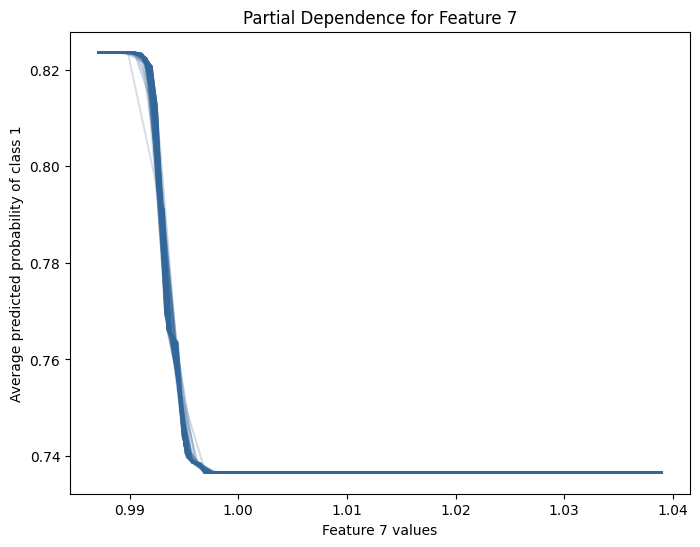

In [16]:
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

grid_length = np.linspace(20, 120, 40)
fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure and axis for plotting

# Define a base color and alpha (transparency) values
base_color = (0.2, 0.4, 0.6)  # Blue-ish color
min_alpha = 0.2
max_alpha = 1.0

# Normalize grid_length values between 0 and 1
normalized_g = (grid_length - grid_length.min()) / (grid_length.max() - grid_length.min())

for i, g in enumerate(grid_length):
    # Create feature grid
    feature_values = np.linspace(np.min(X.iloc[:, feature_index]), np.max(X.iloc[:, feature_index]), num=int(g))
    # Initialize array to store average predictions
    average_predictions = np.zeros_like(feature_values)
    # Duplicate the dataset to modify feature values
    X_modified = X.copy()
    # Loop over feature values
    for j, value in enumerate(feature_values):
        # Set the chosen feature to the current value for all instances
        X_modified.iloc[:, feature_index] = value
        # Predict using the modified dataset
        predictions = model.predict_proba(X_modified)[:, 1]
        # Calculate average prediction for the current feature value
        average_predictions[j] = np.mean(predictions)
    # Calculate color based on normalized g
    alpha = min_alpha + (max_alpha - min_alpha) * normalized_g[i]
    color = to_rgba(base_color, alpha)
    # Plot the partial dependence for the chosen feature
    ax.plot(feature_values, average_predictions, color=color)

ax.set_xlabel(f'Feature {feature_index} values')
ax.set_ylabel('Average predicted probability of class 1')
ax.set_title(f'Partial Dependence for Feature {feature_index}')
plt.show()

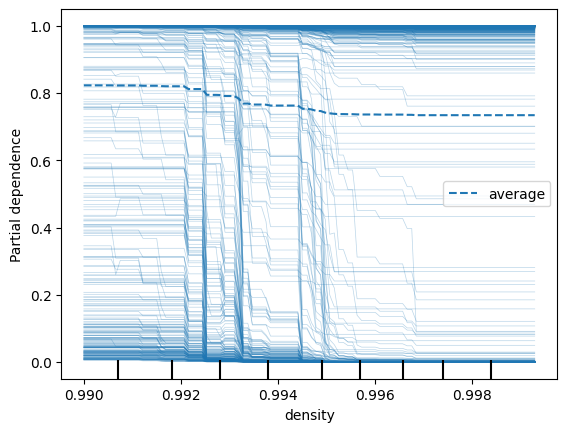

In [17]:
PartialDependenceDisplay.from_estimator(model, X_test, features, kind='both') #kind='both'

### Interpretation

Based on the PDPs shown above, the shape of the curve for partial dependence looks like a decreasing logistic plot where it is constant at the beginning and the end and there is an almost linear decreased in between. This shows there is negative relationship between "density" and its ability to predict if the wine is a white wine. As "density" increases from 0.992 to 0.995, the probability of predicting white wine decreased from 0.82 to 0.74. However when "density" is greater than or equal to 0.995, the prediction probability stays constant. Therefore when "density" is less than 0.992 or more than 0.995, it has little effect on the prediction of white wine. This interpretation makes sense because white wine usually has less density compared to red wine, and the densities of both red and white wines do not differ much from ~0.99-1.0.



## ALE Plots

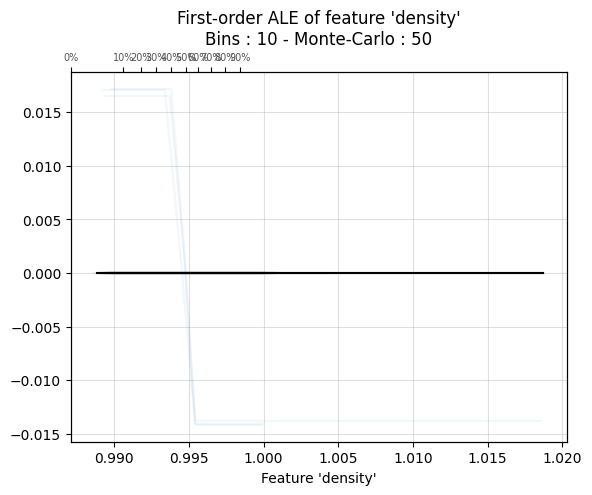

<Axes: title={'center': "First-order ALE of feature 'density'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'density'">

In [18]:
# Use default parameters for 1D Main Effect ALE Plot
ale_plot(model, X_train, 'density', monte_carlo=True)

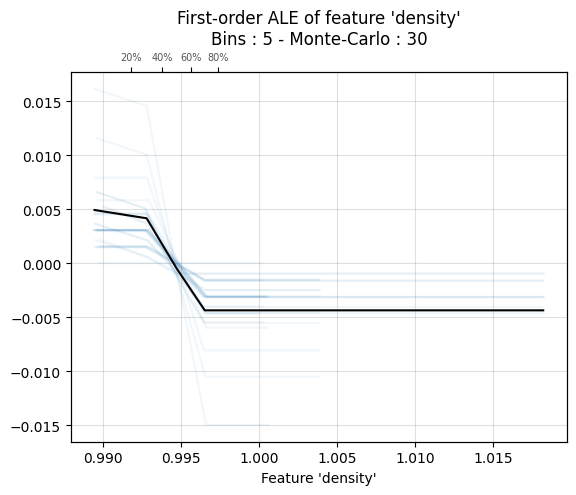

<Axes: title={'center': "First-order ALE of feature 'density'\nBins : 5 - Monte-Carlo : 30"}, xlabel="Feature 'density'">

In [19]:
# Change hyperparameters for 1D Main Effect ALE Plot
ale_plot(
    model,
    X_train,
    "density",
    bins=5,
    monte_carlo=True,
    monte_carlo_rep=30,
    monte_carlo_ratio=0.5,
)

### Interpretation for 1D Main Effect ALE Plot

The x-axis has the feature values for "density", and the y-axis shows the average effect of predictions. When "density" increases from 0.990 to 0.993, there is a slight decreasing effect on the predictions. Then, when "density" increases from 0.993 to 0.997, there is a significant decreasing effect on the predictions as shown by the steep linear decrease. Finally when "density" increases from 0.997, there is a flat line indicating barely any impact to the prediction.

In [20]:
!pip install scipy==1.13.0

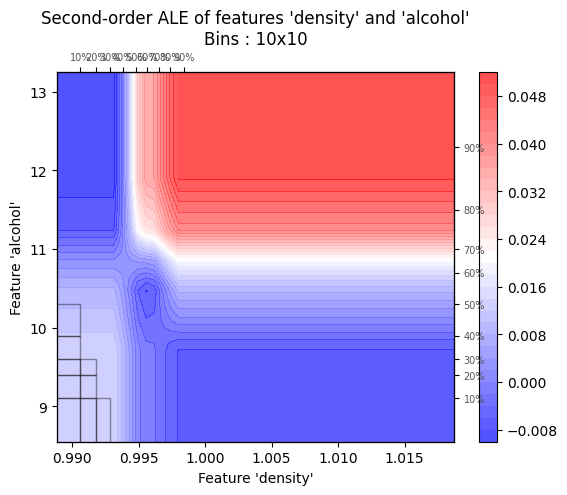

<Axes: title={'center': "Second-order ALE of features 'density' and 'alcohol'\nBins : 10x10"}, xlabel="Feature 'density'", ylabel="Feature 'alcohol'">

In [27]:
# 2D Second-Order ALE Plot
ale_plot(model, X_train, ['density', 'alcohol'], bins=10)

### Interpretation

The x-axis represents the feature values for "density", and the y-axis represents the feature values for "alcohol". The areas on the plot that are red represent where the model tends to make higher predictions, and the areas on the plot that are blue represent where the model tends to make lower predictions. So when "alcohol" is higher than 11 and the "density" is greater than 0.995, the model tends to make higher prediction probabilities. There are peaks where the plot is red, which means that the joint effect of "density" and "alcohol" on the model's prediction is strong where it peaks. The white areas on the plot show that the features have barely any effect on the predictions.

#### There was no use of AI in this assignment.